# Figure S2. Extended performance comparison of ColocBoost against other multi-trait colocalization methods.

- **S2a**. Schematics of a broad range of simulation designs used for comprehensive benchmarking, including realistic simulation analyses, simulation designs adopted in original publications of competing methods, and simulation with correlated traits. (See details in Supplementary Note). 
- **S2b**. Scatter plot of the negative logarithm of False Discovery Rate (-log(FDR)) and power of ColocBoost and HyPrColoc across varying numbers of true causal variants (see Methods for details on the computation of power and FDR). The vertical red line represents the FDR cut-off of 0.5. 
- **S2c**. Size of CoS and purity comparisons in simulation designs involving 2, 5, 10, and 20 traits. 
- **S2d**. Statistical power and FDR of ColocBoost and HyPrColoc in simulation design involving 50 traits, up to five causal variant per trait per locus. 
- **S2e**. Statistical power and FDR of ColocBoost and HyPrColoc in simulation designs adopted in HyPrColoc with 10 traits and four different causal configurations of 10 traits (codenamed “3+3+2+2”, “5+5”, “5+5+1rand”, “5+5+1rand+1rand” with definitions provided in Supplementary Note S.6). 
- **S2f**. Statistical power and FDR of ColocBoost and HyPrColoc in a fully colocalized scenario where multiple causal variants affects all traits, involving 5,10, and 20 phenotypes with up to five true causal variants. 
- **S2g**. Comprehensive comparison of type I error rate of ColocBoost and HyPrColoc under a null scenario with no causal variants across any trait. 

The error bars in panels b-g represent 95% confidence intervals.

## Figure S2a
Schematics of a broad range of simulation designs used for comprehensive benchmarking, including realistic simulation analyses, simulation designs adopted in original publications of competing methods, and simulation with correlated traits. See details about the simulation design in [Simulation Studies](https://statfungen.github.io/colocboost-paper/Simulation_Studies/0_Schematics_Simulation.html).

## Figure S2b
Scatter plot of the negative logarithm of False Discovery Rate (-log(FDR)) and power of ColocBoost and HyPrColoc across varying numbers of true causal variants (see Methods for details on the computation of power and FDR). The vertical red line represents the FDR cut-off of 0.5. 

In [3]:
library(ggplot2)
sumstat = readRDS("Figure_S2b.rds")
colors_man <- c("#B24745FF", "#00A1D5FF")
sd = 1.96
p <- ggplot(sumstat, aes(x = logFDR, y = power, color = method, shape = marginal_trait_number)) +
  geom_point(size = 6) +
  scale_shape_manual(values = c("2" = 15, "5" = 17, "10" = 19, "20" = 18)) + 
  # guides(shape = "none") +
  geom_errorbar(aes(ymin = power - sd*power_SD, ymax = power + sd*power_SD), linewidth = 1) +
  geom_errorbarh(aes(xmin = xmin, xmax = xmax), linewidth = 1) +
  scale_color_manual(values = c("ColocBoost" = colors_man[1],
                                "HyPrColoc" = colors_man[2])) +
  facet_wrap(.~ max_causal,
             labeller = labeller(max_causal = function(x) paste("Max Number of True Causal Variants Per Trait:", x)), scales = "free_x", nrow = 3) +
  geom_vline(xintercept = -log10(0.05), linetype = "dashed", color = "red", linewidth = 1) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "-log10(FDR)",
    y = "Power",
    color = "Method",
    shape = "Number of Traits"
  ) +
  ylim(c(0, 1)) +
  xlim(c(0.5, 2.5)) +
  theme(
    plot.title = element_text(size = 0),
    axis.title.x = element_text(size = 28),
    axis.title.y = element_text(size = 28),
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    strip.text = element_text(size = 20),
    legend.title = element_text(size = 24),
    legend.text = element_text(size = 20),
    legend.position = "inside",
    legend.justification = c(0.95, 0.95),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

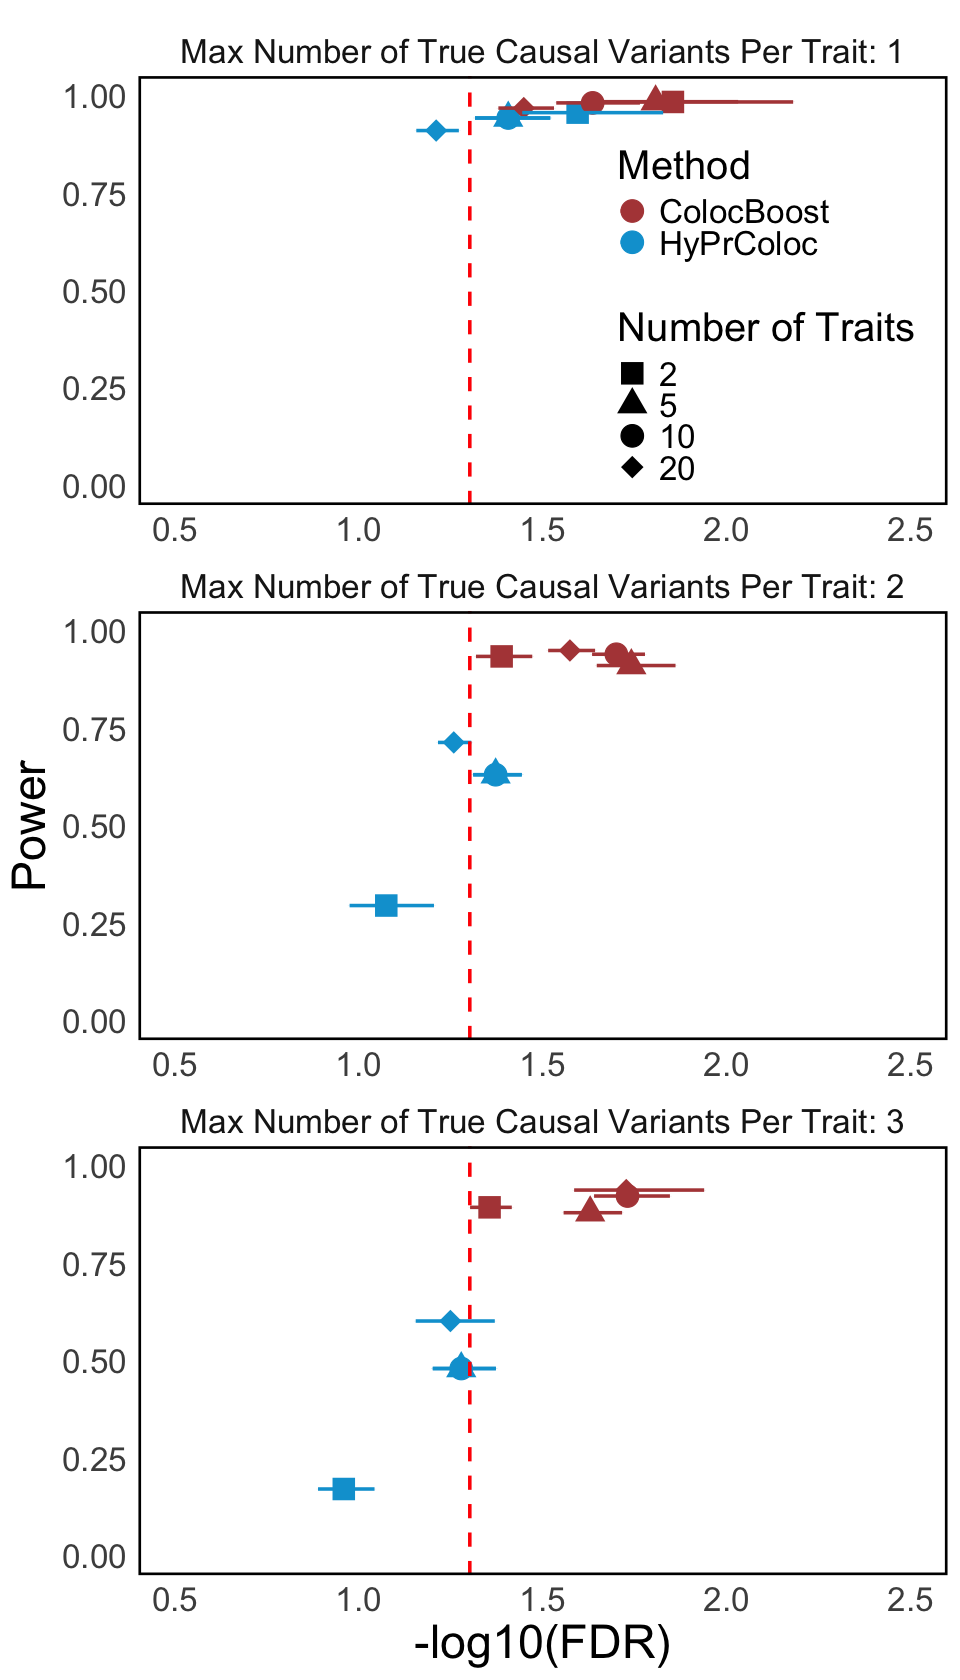

In [4]:
options(repr.plot.width = 8, repr.plot.height = 14)
p

## Figure S2c
Size of CoS and purity comparisons in simulation designs involving 2, 5, 10, and 20 traits. 

In [6]:
library(ggplot2)
library(ggpattern)
library(ggpubr)
library(cowplot)
sumstat = readRDS("Figure_S2c.rds")
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")
p1 <- sumstat$setsize %>% 
  ggplot(aes(x = trait_number, y = median, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 13) + 
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of Traits", y = "Size of CoS", color = "") +
  theme(plot.title = element_text(size = 0),
        axis.title.x = element_text(size = 28),
        axis.title.y = element_text(size = 28),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 20),
        legend.title = element_text(size = 24),
        legend.text = element_text(size = 20),
        legend.position = "inside",
        legend.justification = c(0.05, 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text=element_text(size=16,  family="sans")) 

p2 <- sumstat$purity %>% 
  ggplot(aes(x = trait_number, y = median, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  geom_errorbar(aes(ymin = q1  , 
                    ymax = q3 ),
                width = .2, linewidth = 1,, position = position_dodge(width = 0.7)) +
  geom_hline(yintercept = 0.95, linetype = "dashed", color = "red", linewidth = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) + 
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of Traits", y = "Purity", color = "") +
  theme(plot.title = element_text(size = 0),
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 28),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 20),
        legend.title = element_text(size = 24),
        legend.text = element_text(size = 20),
        legend.position = "none",
        legend.justification = c(0.05, 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text=element_text(size=16,  family="sans")) 

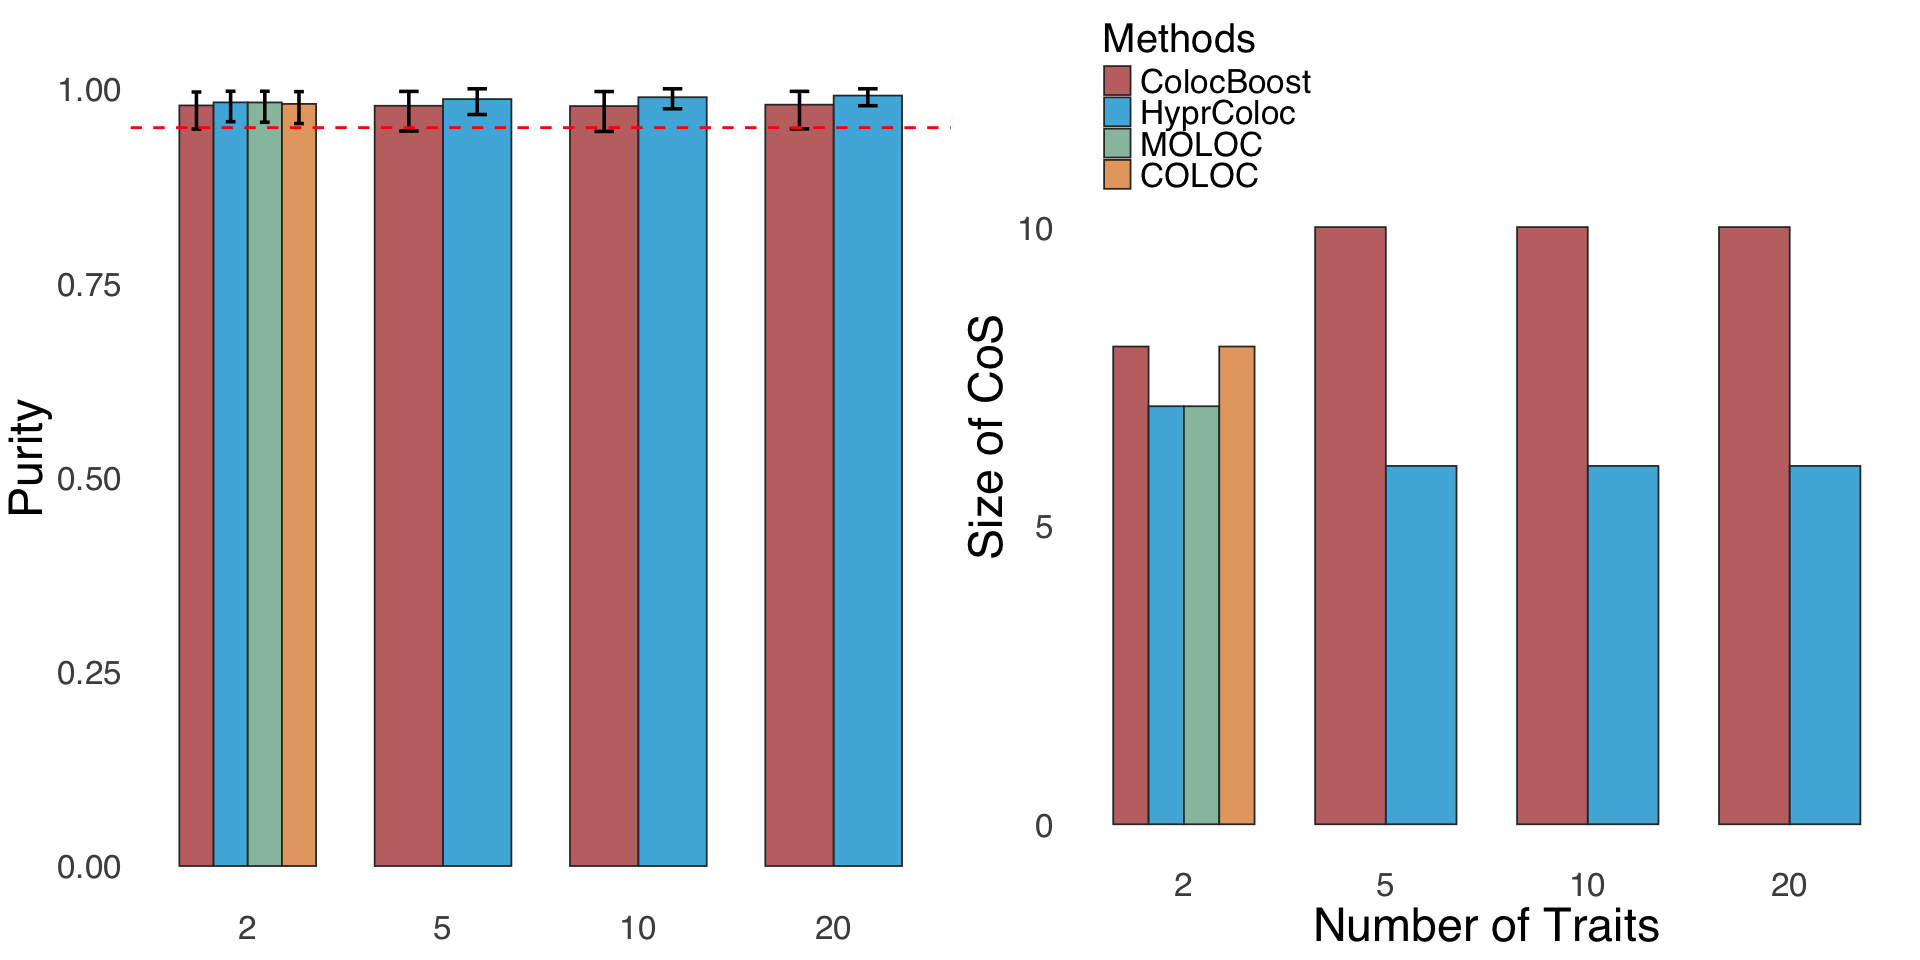

In [8]:
options(repr.plot.width = 16, repr.plot.height = 8)
plot_grid(p2, p1, ncol = 2)

## Figure S2d
Statistical power and FDR of ColocBoost and HyPrColoc in simulation design involving 50 traits, up to five causal variant per trait per locus.

In [9]:
library(ggplot2)
sumstat = readRDS("Figure_S2d.rds")
colors_man <- c("#B24745FF", "#00A1D5FF")
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(total_causal_var_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of True Causal Variants Per Region", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        plot.title = element_text(size = 0),
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = as.character(total_causal_var_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.4) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of True Causal Variants Per Region", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "bottom",
        plot.title = element_text(size = 0),
        axis.title.x = element_text(size = 22),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 0, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )


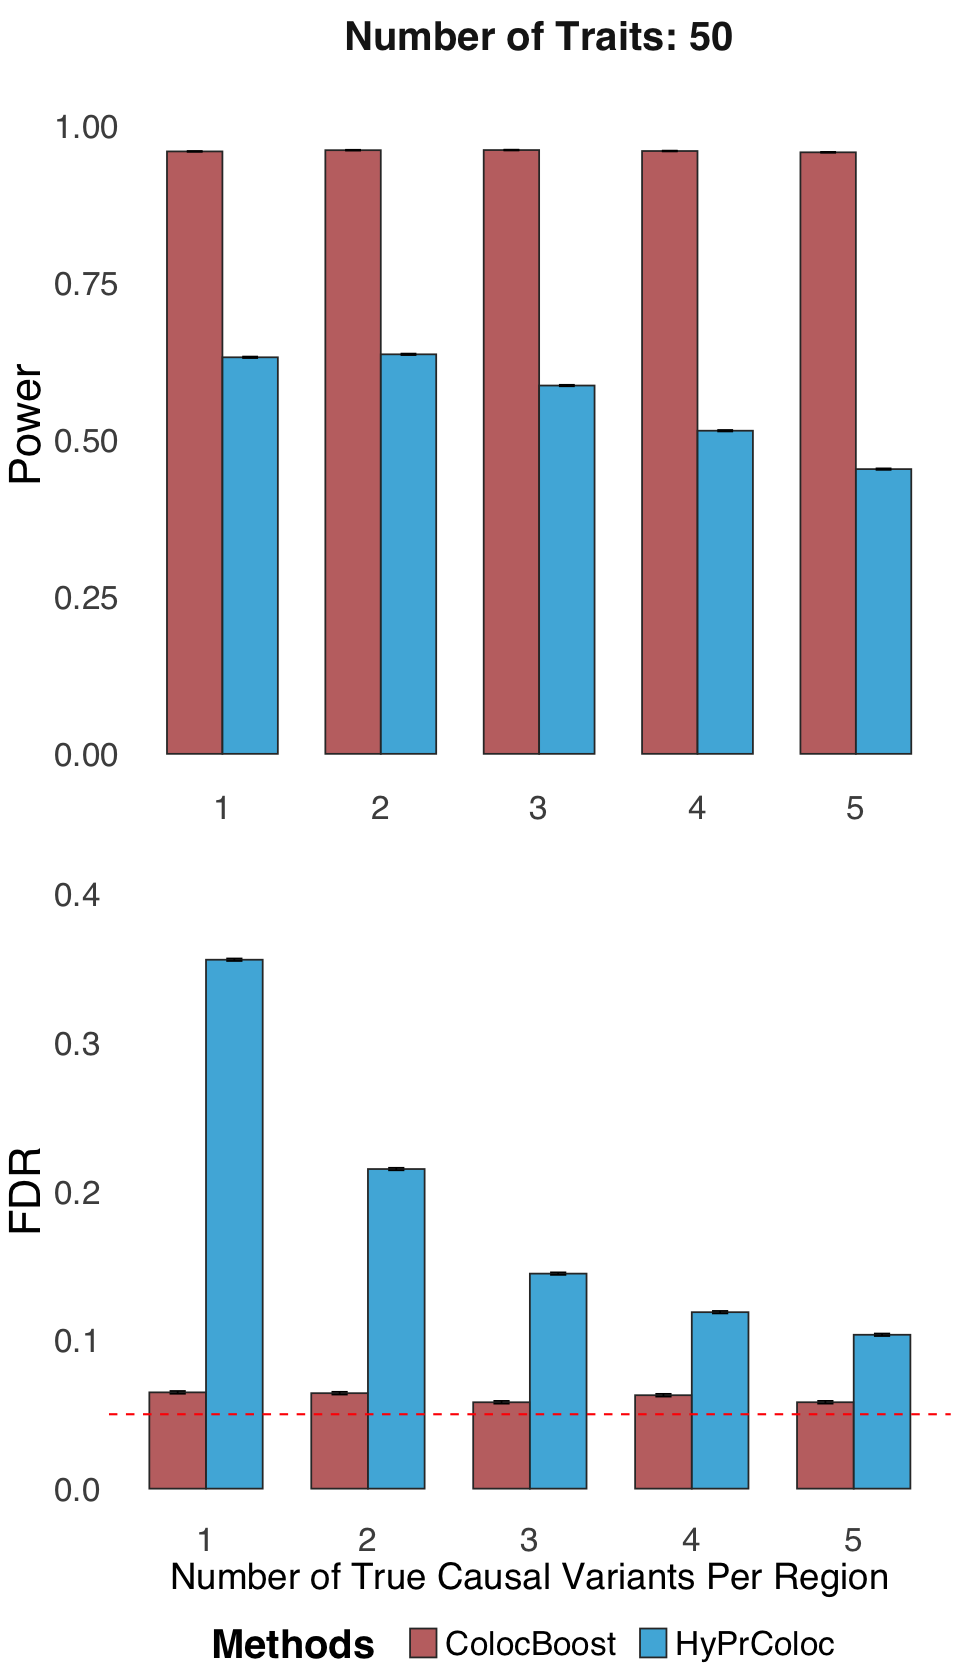

In [11]:
options(repr.plot.width = 8, repr.plot.height = 14)
plot_grid(p1, p2, ncol = 1)

## Figure S2e
Statistical power and FDR of ColocBoost and HyPrColoc in simulation designs adopted in HyPrColoc with 10 traits and four different causal configurations of 10 traits (codenamed “3+3+2+2”, “5+5”, “5+5+1rand”, “5+5+1rand+1rand” with definitions provided in Supplementary Note S.6). 

In [12]:
library(ggplot2)
sumstat = readRDS("Figure_S2e.rds")
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")
p1 <- sumstat %>% 
  ggplot(aes(x = case, y = weighted_power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05)  +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = weighted_power - 1.96*sqrt(weighted_power * (1-weighted_power)/total_trait_number), 
                    ymax = weighted_power + 1.96*sqrt(weighted_power * (1-weighted_power)/total_trait_number)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Simulation Design", y = "Power", color = "Methods", title = "Number of Traits: 10") +
  theme(legend.position = "none",
        plot.title = element_text(size = 26, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 0),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = case, y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = FDR - 1.96*sqrt(FDR * (1-FDR)/total_trait_number), 
                    ymax = FDR + 1.96*sqrt(FDR * (1-FDR)/total_trait_number)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Simulation Design", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  #geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )


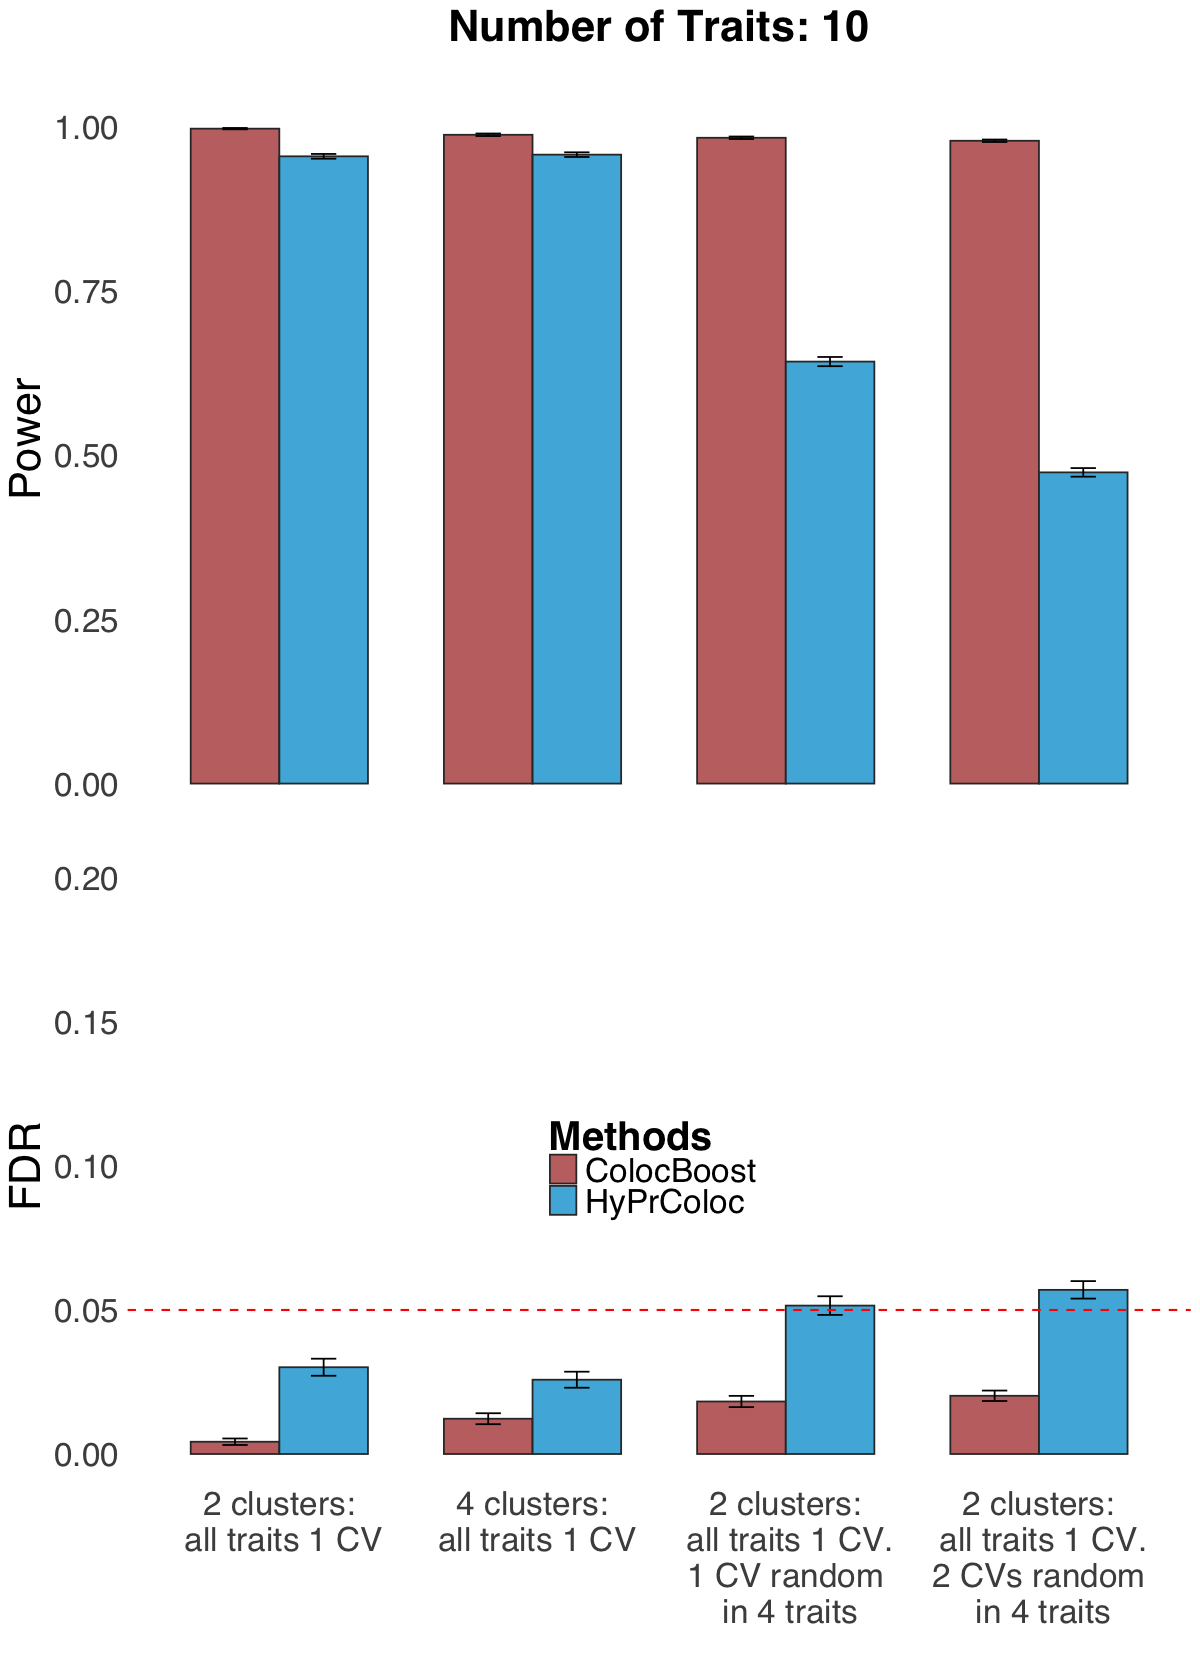

In [14]:
options(repr.plot.width = 10, repr.plot.height = 14)
plot_grid(p1, p2, ncol = 1)

## Figure S2f
Statistical power and FDR of ColocBoost and HyPrColoc in a fully colocalized scenario where multiple causal variants affects all traits, involving 5,10, and 20 phenotypes with up to five true causal variants.

In [15]:
library(ggplot2)
sumstat = readRDS("Figure_S2f.rds")
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(total_causal_var_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of True Causal Variants Per Region", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = as.character(total_causal_var_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.4) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of True Causal Variants Per Region", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "bottom",
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

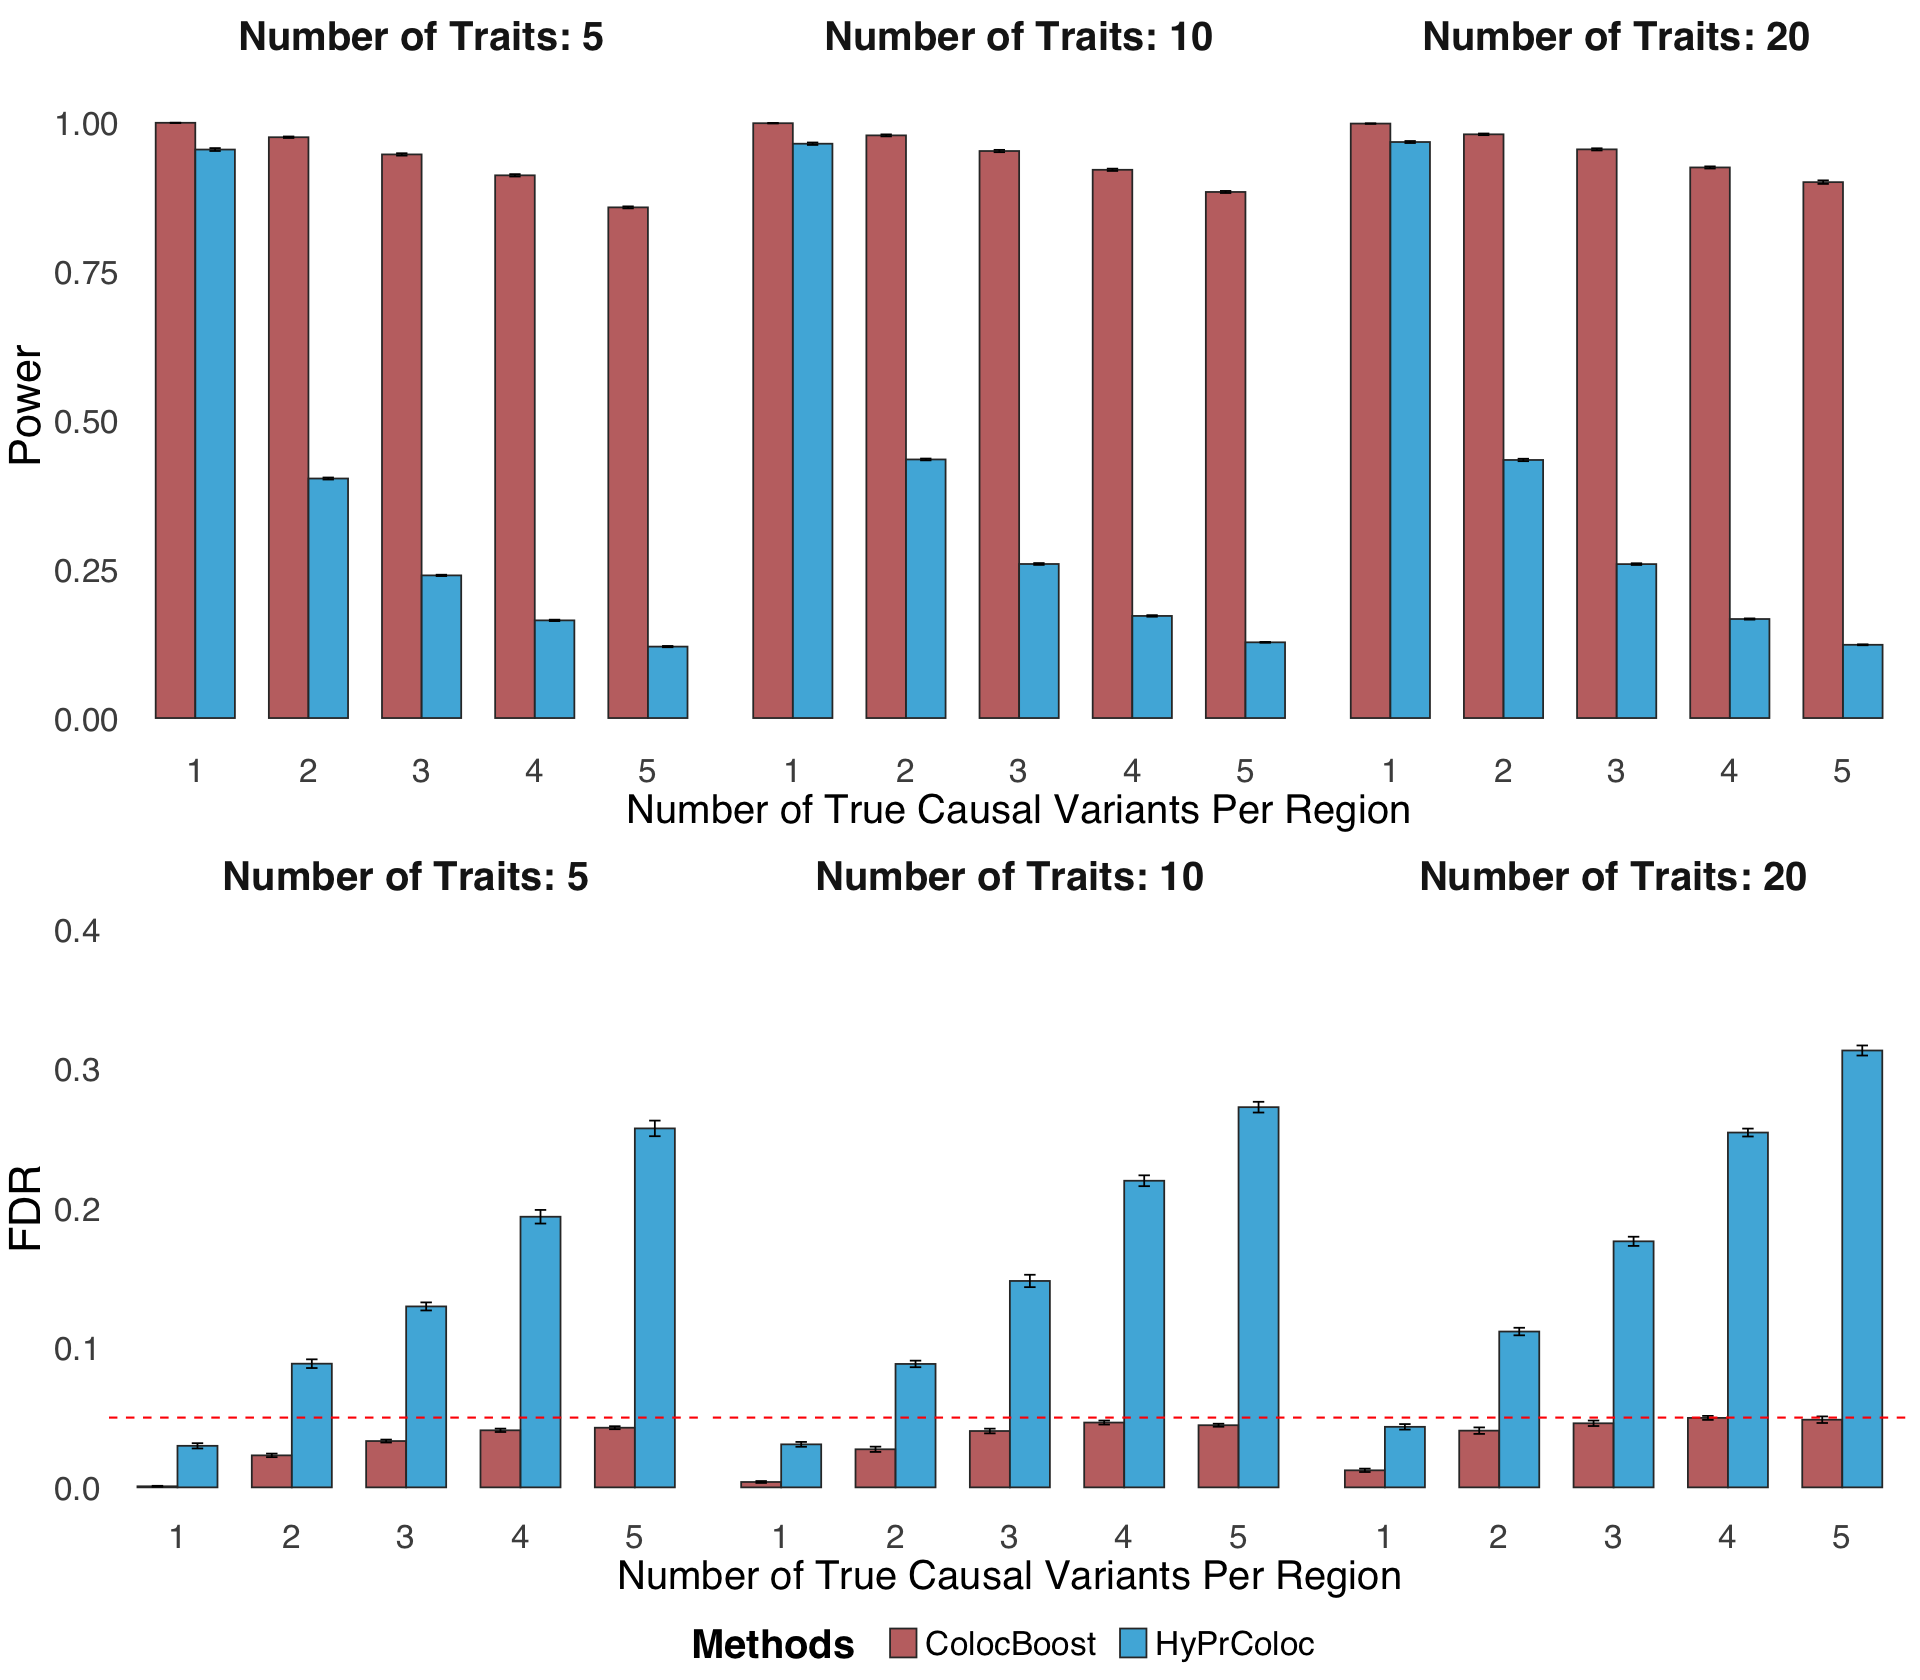

In [17]:
options(repr.plot.width = 16, repr.plot.height = 14)
plot_grid(p1, p2, ncol = 1)

## Figure S2g
Comprehensive comparison of type I error rate of ColocBoost and HyPrColoc under a null scenario with no causal variants across any trait.

In [18]:
library(ggplot2)
sumstat = readRDS("Figure_S2g.rds")
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")
p <- sumstat %>% ggplot(aes(x = as.factor(trait_number), y = wrong_set_number / 1287, fill = method))+
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +  geom_hline(yintercept = 0.01, linetype = "dashed", color = "red", linewidth = 0.6) + 
  ylim(0, 0.05) +
  theme_minimal()+     facet_wrap( ~ variance, labeller = labeller(variance = function(x) paste("Random Noise Variance:", x)), scales = "free_x", nrow = 3) +
  labs(x = "Numer of Traits", y = "Type I Error Rate")  + 
  theme_minimal() + 
  scale_fill_manual(values = colors_man, name = "Methods")  +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

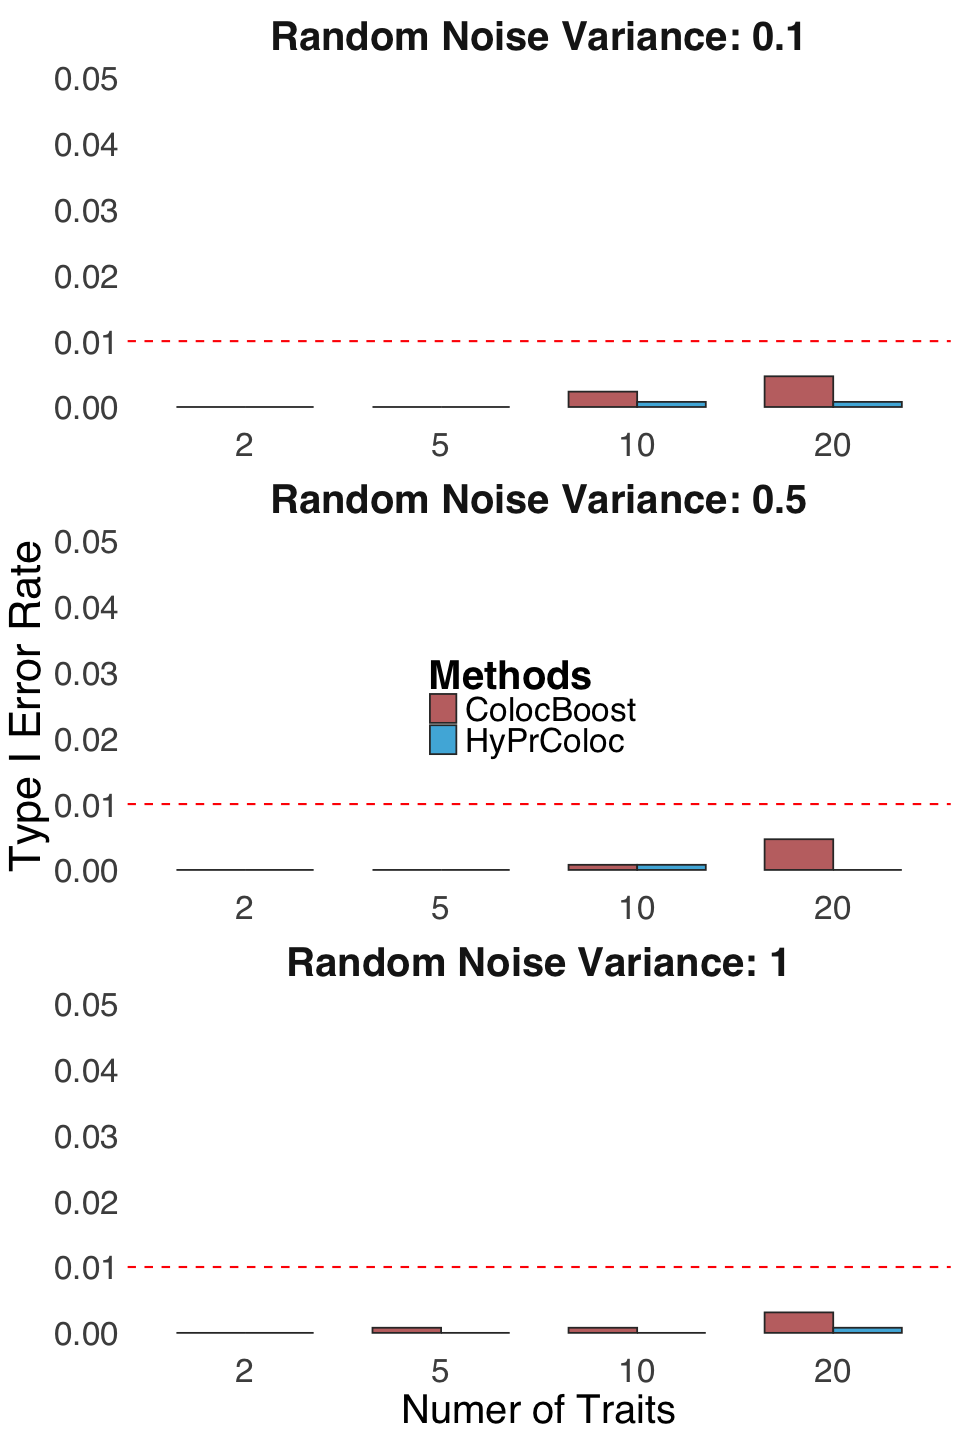

In [22]:
options(repr.plot.width = 8, repr.plot.height = 12)
p